## Autoencoder Project

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

In [3]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


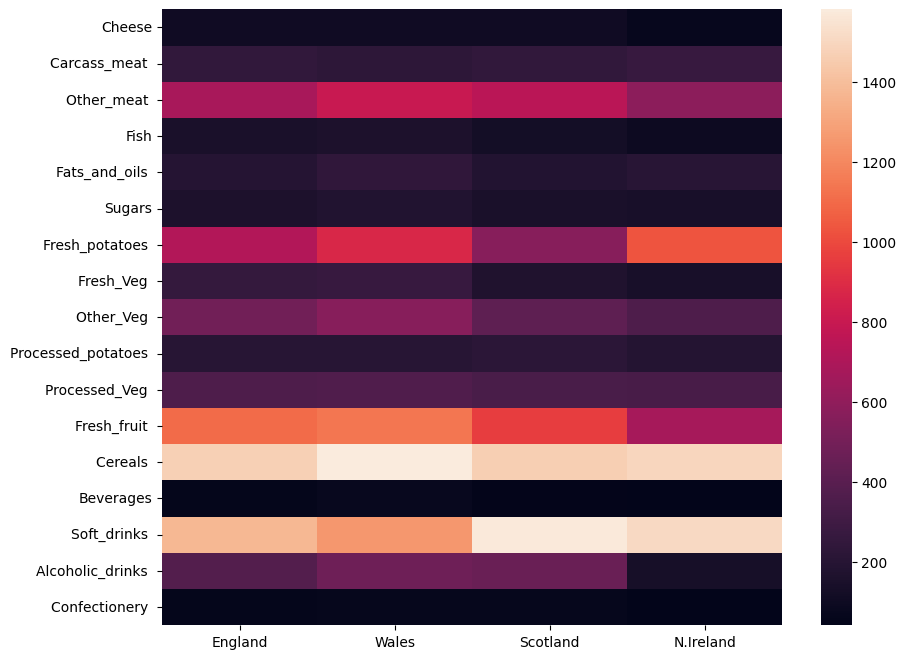

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df);

In [9]:
import tensorflow as tf 
keras = tf.keras 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD 

# 17 features to 2 
encoder = Sequential()

encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

# Back to 17 features 
decoder = Sequential()

decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer=SGD(learning_rate=1.5), loss='mse')



In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df.transpose().values)

In [11]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 752ms/step - loss: 0.4032
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2885
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2483
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2231
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2672
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1933
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1882
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1838
Epoch 10/15
1/1 [==============================] - 0s 4ms/step - loss: 0.1815
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1827
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2064
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 

In [12]:
encoded_2features = encoder.predict(scaled_df)

1/1 [==============================] - 0s 76ms/step


In [13]:
encoded_2features

array([[0.60680515, 0.        ],
       [1.5031431 , 0.        ],
       [0.47586223, 0.        ],
       [0.07787415, 0.04607359]], dtype=float32)

In [17]:
results = pd.DataFrame(data=encoded_2features,index=df.transpose().index,
                      columns=['F1','F2'])

In [18]:
results

,F1,F2
England,0.606805,0.000000
Wales,1.503143,0.000000
Scotland,0.475862,0.000000
N.Ireland,0.077874,0.046074


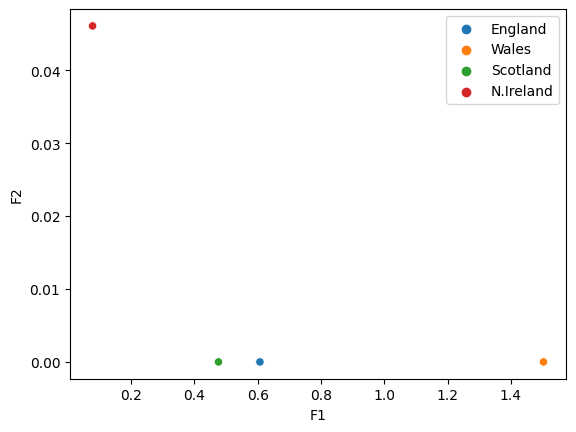

In [24]:
sns.scatterplot(x='F1',y='F2',data=results,hue=results.index);

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks.